In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import seaborn as sns

%matplotlib inline

## Data Ingestion

In [280]:
data = pd.read_csv('POC_Revenue_Extrapolation_f.csv', sep='\t')
data.head()

,Day,Unique Visitors,Cart Adds(Visitor),Cart Removal (Visitor)_SJ,Start Checkouts (Visitor),Orders (Visitor),Revenue
0,11/1/18,73543,6043,1850,19,1885,507698
1,11/2/18,73303,5866,1562,7,1983,400065
2,11/3/18,65880,5387,1404,3,1817,399943
3,11/4/18,68678,5637,1551,4,1841,223875
4,11/5/18,74023,5866,3345,1573,1698,369716


## Data Wrangling

In [285]:
cols=['Date','Unique_Visitors', 'Cart_Adds', 'Cart_Removal', 'Start_Checkouts', 'Orders','Revenue']

In [286]:
data.dtypes

Date               object
Unique_Visitors     int64
Cart_Adds           int64
Cart_Removal        int64
Start_Checkouts     int64
Orders              int64
Revenue             int64
dtype: object

In [287]:
data.columns = cols
data.head()

,Date,Unique_Visitors,Cart_Adds,Cart_Removal,Start_Checkouts,Orders,Revenue
0,11/1/18,73543,6043,1850,19,1885,507698
1,11/2/18,73303,5866,1562,7,1983,400065
2,11/3/18,65880,5387,1404,3,1817,399943
3,11/4/18,68678,5637,1551,4,1841,223875
4,11/5/18,74023,5866,3345,1573,1698,369716


In [288]:
data.shape

(92, 7)

In [289]:
data.dtypes

Date               object
Unique_Visitors     int64
Cart_Adds           int64
Cart_Removal        int64
Start_Checkouts     int64
Orders              int64
Revenue             int64
dtype: object

In [290]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data.head()

,Date,Unique_Visitors,Cart_Adds,Cart_Removal,Start_Checkouts,Orders,Revenue
0,2018-01-11,73543,6043,1850,19,1885,507698
1,2018-02-11,73303,5866,1562,7,1983,400065
2,2018-03-11,65880,5387,1404,3,1817,399943
3,2018-04-11,68678,5637,1551,4,1841,223875
4,2018-05-11,74023,5866,3345,1573,1698,369716


In [291]:
data['Date'].dt.day.head()

0    11
1    11
2    11
3    11
4    11
Name: Date, dtype: int64

In [292]:
data.sort_values('Date')
data.head()

,Date,Unique_Visitors,Cart_Adds,Cart_Removal,Start_Checkouts,Orders,Revenue
0,2018-01-11,73543,6043,1850,19,1885,507698
1,2018-02-11,73303,5866,1562,7,1983,400065
2,2018-03-11,65880,5387,1404,3,1817,399943
3,2018-04-11,68678,5637,1551,4,1841,223875
4,2018-05-11,74023,5866,3345,1573,1698,369716


In [293]:
data['Date'].dtype

dtype('<M8[ns]')

## Data Munging

In [294]:
data['Average-Order-Value'] = data['Revenue']/data['Orders']
data.head()

,Date,Unique_Visitors,Cart_Adds,Cart_Removal,Start_Checkouts,Orders,Revenue,Average-Order-Value
0,2018-01-11,73543,6043,1850,19,1885,507698,269.335809
1,2018-02-11,73303,5866,1562,7,1983,400065,201.747352
2,2018-03-11,65880,5387,1404,3,1817,399943,220.111723
3,2018-04-11,68678,5637,1551,4,1841,223875,121.605106
4,2018-05-11,74023,5866,3345,1573,1698,369716,217.736160


In [295]:
data['purchase_frequency'] = data['Orders']/data['Unique_Visitors']
data.head()

,Date,Unique_Visitors,Cart_Adds,Cart_Removal,Start_Checkouts,Orders,Revenue,Average-Order-Value,purchase_frequency
0,2018-01-11,73543,6043,1850,19,1885,507698,269.335809,0.025631
1,2018-02-11,73303,5866,1562,7,1983,400065,201.747352,0.027052
2,2018-03-11,65880,5387,1404,3,1817,399943,220.111723,0.027580
3,2018-04-11,68678,5637,1551,4,1841,223875,121.605106,0.026806
4,2018-05-11,74023,5866,3345,1573,1698,369716,217.736160,0.022939


### https://towardsdatascience.com/whats-a-customer-worth-8daf183f8a4f - just to read

## https://medium.com/airbnb-engineering/using-machine-learning-to-predict-value-of-homes-on-airbnb-9272d3d4739d

In [189]:
def get_cum_sum(date_filter):
    return data['Revenue'].where(data['Date']<=date_filter).sum()

def get_users_utd(date_filter):
    return data['Unique_Visitors'].where(data['Date']<=date_filter).count()

In [190]:
data['cum_revenue'] = data['Date'].map(lambda x : get_cum_sum(x))
data.head()

,Date,Unique_Visitors,Cart_Adds,Cart_Removal,Start_Checkouts,Orders,Revenue,cum_revenue
0,2018-01-11,73543,6043,1850,19,1885,507698,507698.0
1,2018-02-11,73303,5866,1562,7,1983,400065,1186081.0
2,2018-03-11,65880,5387,1404,3,1817,399943,1854355.0
3,2018-04-11,68678,5637,1551,4,1841,223875,2535529.0
4,2018-05-11,74023,5866,3345,1573,1698,369716,3282674.0


In [191]:
data['utd_visitors'] = data['Date'].map(lambda x: get_users_utd(x) )
data.head()

,Date,Unique_Visitors,Cart_Adds,Cart_Removal,Start_Checkouts,Orders,Revenue,cum_revenue,utd_visitors
0,2018-01-11,73543,6043,1850,19,1885,507698,507698.0,1
1,2018-02-11,73303,5866,1562,7,1983,400065,1186081.0,3
2,2018-03-11,65880,5387,1404,3,1817,399943,1854355.0,5
3,2018-04-11,68678,5637,1551,4,1841,223875,2535529.0,7
4,2018-05-11,74023,5866,3345,1573,1698,369716,3282674.0,9


In [192]:
data.iloc[0:1]['Date'].dt.day

0    11
Name: Date, dtype: int64

In [198]:

data['ltv'] = data['cum_revenue']/data['utd_visitors'].astype(float)
#data['day'] = pd.to_timedelta(data['Date'] - data['install_date'].min()).dt.days + 1
#data['day'] = data['day'].astype(int)
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data.head(10)

,Date,Unique_Visitors,Cart_Adds,Cart_Removal,Start_Checkouts,Orders,Revenue,cum_revenue,utd_visitors,ltv,month,day
0,2018-01-11,73543,6043,1850,19,1885,507698,507698.0,1,507698.000000,1,11
1,2018-02-11,73303,5866,1562,7,1983,400065,1186081.0,3,395360.333333,2,11
2,2018-03-11,65880,5387,1404,3,1817,399943,1854355.0,5,370871.000000,3,11
3,2018-04-11,68678,5637,1551,4,1841,223875,2535529.0,7,362218.428571,4,11
4,2018-05-11,74023,5866,3345,1573,1698,369716,3282674.0,9,364741.555556,5,11
5,2018-06-11,72043,5693,4379,2754,1798,335772,4405018.0,11,400456.181818,6,11
6,2018-07-11,73296,5142,4258,2483,1642,302842,5163310.0,13,397177.692308,7,11
7,2018-08-11,71639,5319,4386,2557,1589,356716,6356246.0,15,423749.733333,8,11
8,2018-09-11,73059,5189,4267,2598,1793,597224,7366337.0,17,433313.941176,9,11
9,2018-10-11,67559,4909,4282,2482,1757,255449,7974713.0,19,419721.736842,10,11


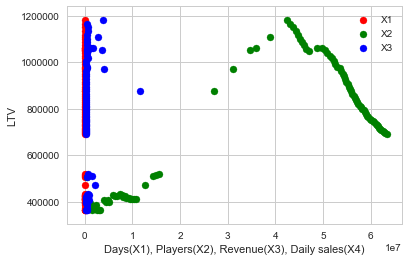

In [199]:
plt.scatter(data['utd_visitors'], data['ltv'], color='r')
plt.scatter(data['cum_revenue'], data['ltv'], color='g')
plt.scatter(data['Revenue'], data['ltv'], color='b')
plt.xlabel('Days(X1), Players(X2), Revenue(X3), Daily sales(X4)')
plt.ylabel('LTV')
plt.legend(['X1', 'X2', 'X3'])

In [200]:
data.shape

(92, 12)

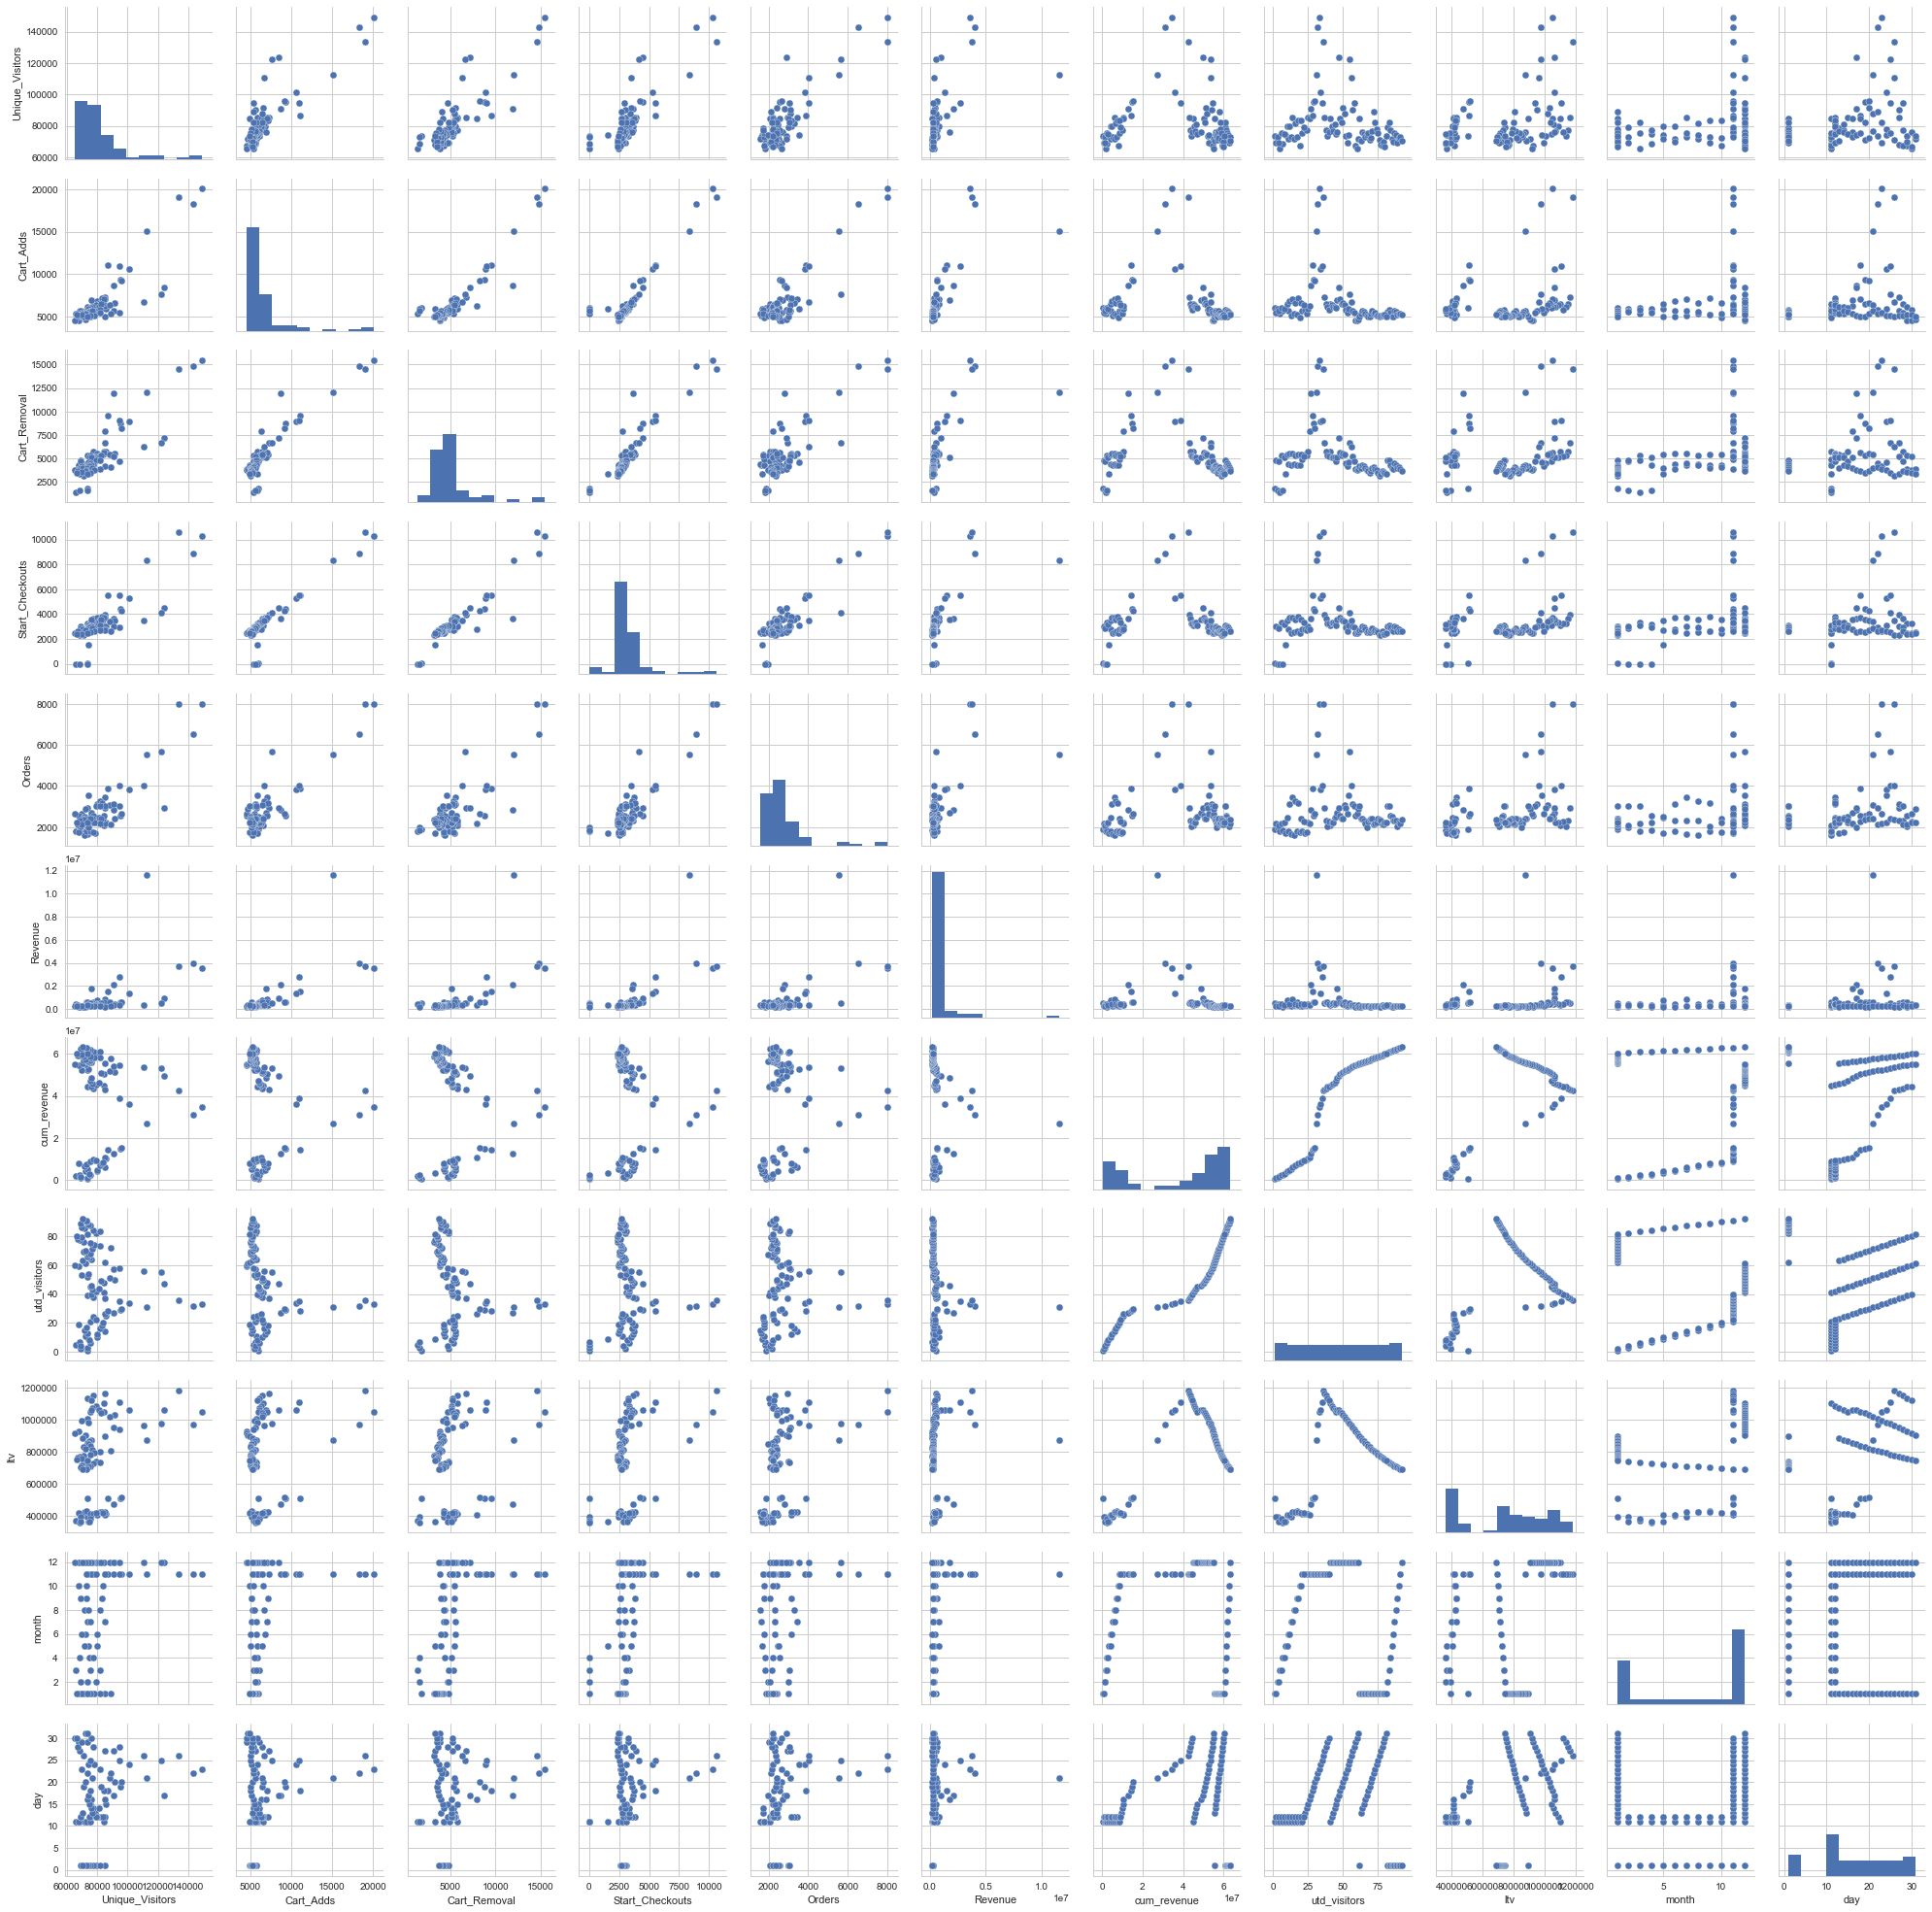

In [201]:
sns.pairplot(data)

In [202]:
ltv_data = data[['utd_visitors', 'cum_revenue', 'ltv', 'day']]
X = ltv_data[['utd_visitors','cum_revenue']]
y = ltv_data['ltv']

In [203]:
X[X['utd_visitors']==0]

,utd_visitors,cum_revenue


In [204]:
X.drop(X[X['utd_visitors']==0].index, axis=0, inplace=True)

/Users/sulbha/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [205]:
y.drop(y[y.isnull()].index, axis=0, inplace=True)


/Users/sulbha/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:2533: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(obj)


In [206]:
X_l = X['utd_visitors'].values 
Y_l = y.values

coefs_l, cov = optimize.curve_fit(lambda t,a,b: a+b*np.log(t),  X_l,  Y_l)

print (coefs_l)

def ltv_func(param):
    result = coefs_l[0] + coefs_l[1]*np.log(param)
    return result
    

ltv_90_180 = ltv_func([90., 180.])
ltv90 = round(ltv_90_180[0],2)
ltv180 = round(ltv_90_180[1],2)

print ("LTV by day 90: " + str(ltv90))
print ("LTV by day 180: " + str(ltv180))


[136628.65634362 171484.07342081]
LTV by day 90: 908274.35
LTV by day 180: 1027138.05


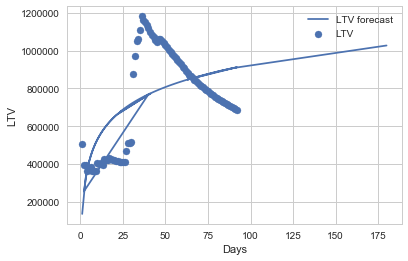

In [207]:
days = np.hstack([X_l, [90, 180]])
plt.scatter(X_l,y.values)
plt.plot(days,ltv_func(days.reshape(-1, 1)))
plt.xlabel('Days')
plt.ylabel('LTV')
plt.legend(['LTV forecast', 'LTV'])

In [208]:
ltv_data['cum_revenue'].loc[ltv_data['day']==13].values[0]

9489690.0

In [209]:
k_days = [1, 13, 23, 31]
ks= []
for k in k_days:
    ##print (k)
    ##print (ltv_data['cum_revenue'].loc[ltv_data['day'] == k])
    k_revenue = ltv_data['cum_revenue'].loc[ltv_data['day'] == k].values[0] 
    coeff = ltv180/k_revenue
    ks.append(coeff)
    print ("K" + str(k) + ": " + str(round(coeff, 2)))
k180 = ltv180/(ltv180 * ltv_data['utd_visitors'].max())

K1: 0.02
K13: 0.11
K23: 0.03
K31: 0.02


Text(0, 0.5, 'KN')

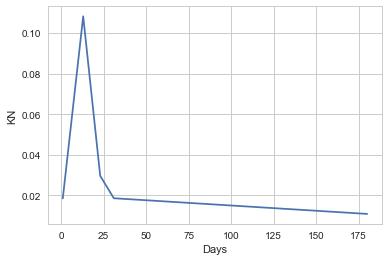

In [210]:
k_days.append(180)
ks.append(k180)
plt.plot(k_days, ks)
plt.xlabel('Days')
plt.ylabel('KN')

# https://www.kaggle.com/jiegeng94/simple-tmdb-prediction-with-gradient-boosting

In [211]:
data.dropna(axis=0, inplace=True)
data.head()

,Date,Unique_Visitors,Cart_Adds,Cart_Removal,Start_Checkouts,Orders,Revenue,cum_revenue,utd_visitors,ltv,month,day
0,2018-01-11,73543,6043,1850,19,1885,507698,507698.0,1,507698.000000,1,11
1,2018-02-11,73303,5866,1562,7,1983,400065,1186081.0,3,395360.333333,2,11
2,2018-03-11,65880,5387,1404,3,1817,399943,1854355.0,5,370871.000000,3,11
3,2018-04-11,68678,5637,1551,4,1841,223875,2535529.0,7,362218.428571,4,11
4,2018-05-11,74023,5866,3345,1573,1698,369716,3282674.0,9,364741.555556,5,11


In [212]:
data[data.isnull()].index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
            85, 86, 87, 88, 89, 90, 91],
           dtype='int64')

In [213]:
data.drop(['cum_revenue', 'utd_visitors', 'ltv'], inplace=True, axis=1)
data.head()

,Date,Unique_Visitors,Cart_Adds,Cart_Removal,Start_Checkouts,Orders,Revenue,month,day
0,2018-01-11,73543,6043,1850,19,1885,507698,1,11
1,2018-02-11,73303,5866,1562,7,1983,400065,2,11
2,2018-03-11,65880,5387,1404,3,1817,399943,3,11
3,2018-04-11,68678,5637,1551,4,1841,223875,4,11
4,2018-05-11,74023,5866,3345,1573,1698,369716,5,11


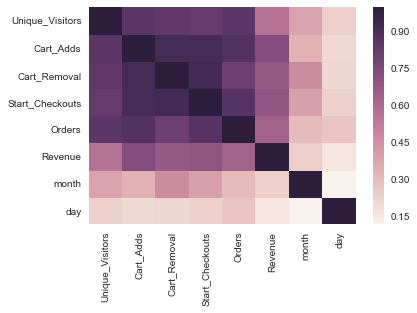

In [214]:
sns.heatmap(data.corr())

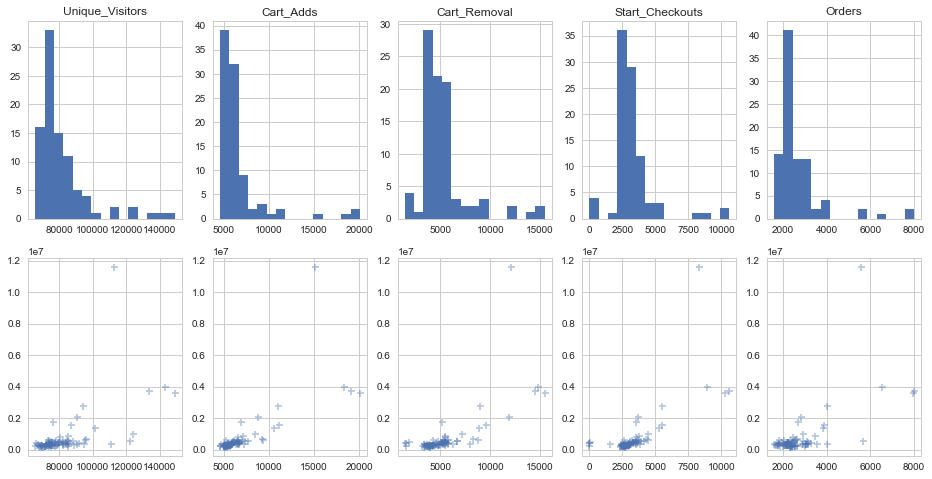

In [217]:
cols = ['Unique_Visitors', 'Cart_Adds', 'Cart_Removal', 'Start_Checkouts', 'Orders']

plt.figure(figsize=(16, 8))
for idx, col in enumerate(cols):
    plt.subplot(2, 5, idx+1)
    plt.hist(data[col], bins=15)
    plt.title(col)
    
    plt.subplot(2, 5, idx+6)
    plt.scatter(x=data[col], y=data.Revenue, alpha=.4, marker='+')
    
plt.show()  

In [218]:
data['month'] = data['Date'].dt.month
data['day']=data['Date'].dt.day
data['year']=data['Date'].dt.year
data.head()

,Date,Unique_Visitors,Cart_Adds,Cart_Removal,Start_Checkouts,Orders,Revenue,month,day,year
0,2018-01-11,73543,6043,1850,19,1885,507698,1,11,2018
1,2018-02-11,73303,5866,1562,7,1983,400065,2,11,2018
2,2018-03-11,65880,5387,1404,3,1817,399943,3,11,2018
3,2018-04-11,68678,5637,1551,4,1841,223875,4,11,2018
4,2018-05-11,74023,5866,3345,1573,1698,369716,5,11,2018


/Users/sulbha/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


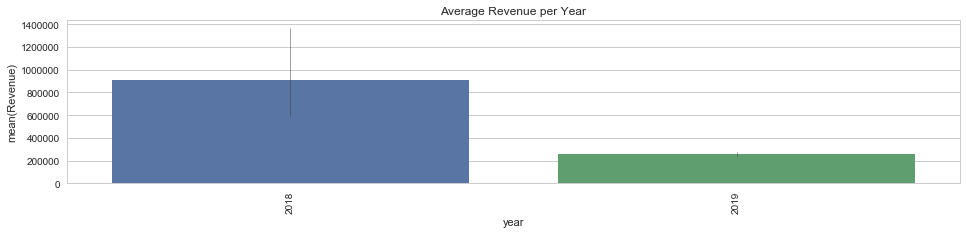

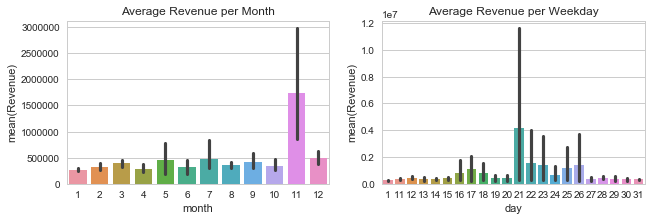

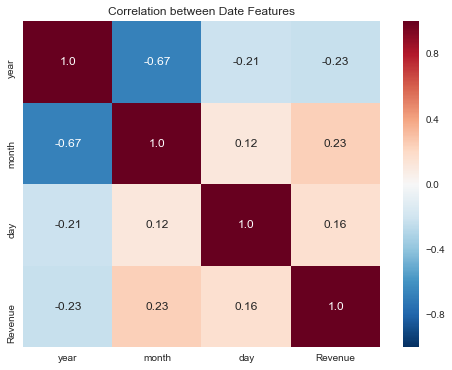

In [219]:
plt.figure(figsize=(16,3))
sns.set(style="whitegrid")
sns.barplot(x='year', y='Revenue', errwidth=0.5, data=data)
plt.xticks(rotation=90)
plt.title('Average Revenue per Year')
plt.show()

plt.figure(figsize=(16,3))
ax = plt.subplot(131)
sns.barplot(x='month', y='Revenue', data=data, ax=ax)
ax.set_title('Average Revenue per Month')

ax = plt.subplot(132)
sns.barplot(x='day', y='Revenue', data=data, ax=ax)
ax.set_title('Average Revenue per Weekday')

#ax = plt.subplot(133)
#sns.barplot(x='release_quarter', y='revenue', data=train, ax=ax)
#ax.set_title('Average Revenue per Quarter')
#plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(data[['year', 'month', 'day', 'Revenue']].corr(), annot=True, fmt='.2', center=0.0, cmap='RdBu_r')
plt.title('Correlation between Date Features')
plt.show()

In [220]:
## feature selection

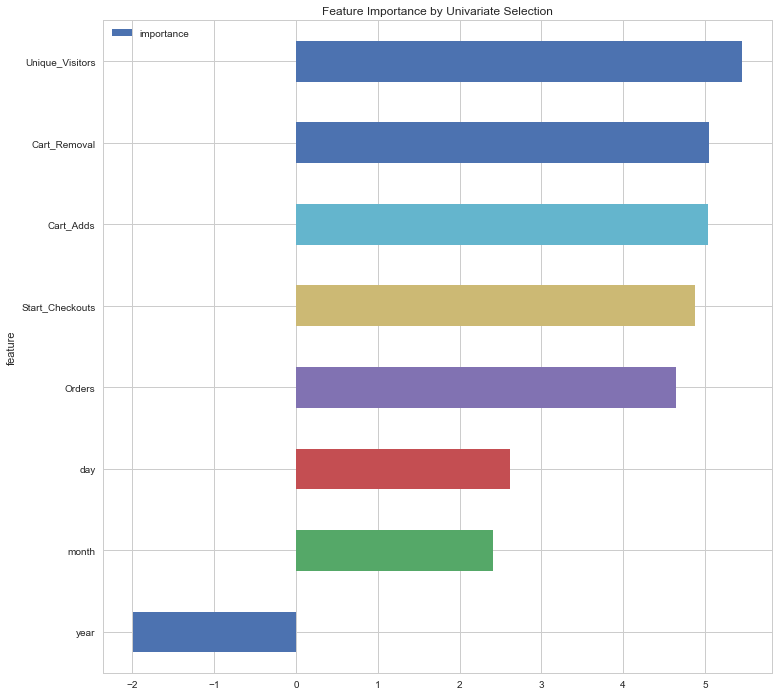

In [221]:
from sklearn.feature_selection import SelectKBest, chi2
features = data.select_dtypes(include=['int64', 'float64', 'uint8', 'int8']).columns.tolist()
#features.remove('id')
features.remove('Revenue')

X, Y = data[features], data['Revenue']

uni_test = SelectKBest(score_func=chi2, k='all')
fit = uni_test.fit(X, Y)

feature_df = pd.DataFrame({'feature': features, 'importance': np.log10(fit.scores_)})
feature_df.sort_values(by='importance', ascending=True, inplace=True)

feature_df.plot.barh(x='feature', y='importance', figsize=(12, 12))
plt.title('Feature Importance by Univariate Selection')

features1 = feature_df.feature[-20:].tolist()

100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


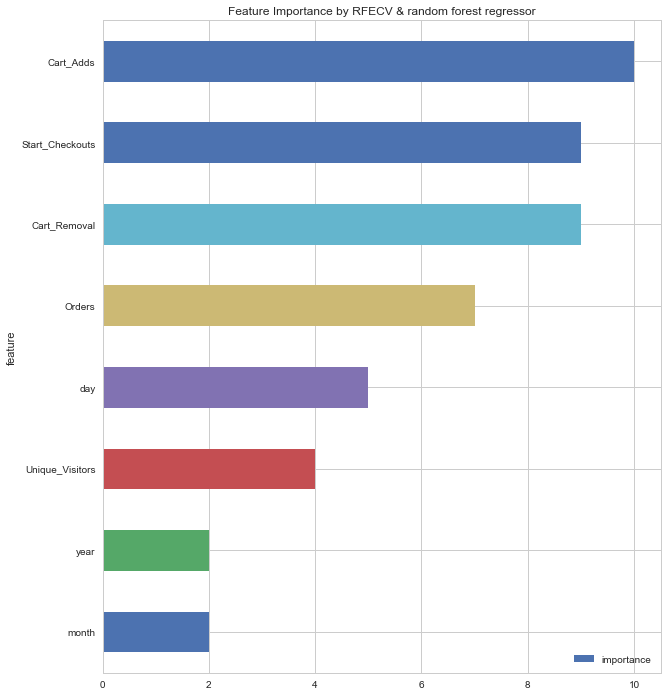

In [222]:
from tqdm import tqdm
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV

importances = np.zeros(len(features))

for i in tqdm(range(10)):
    model = RandomForestRegressor()
    rfecv = RFECV(model, cv=5)
    fit = rfecv.fit(X, Y)

    selected = np.array(fit.support_)
    importances = importances + selected

feature_df = pd.DataFrame({'feature': features, 'importance': importances})
feature_df.sort_values(by='importance', ascending=True, inplace=True)

feature_df.plot.barh(x='feature', y='importance', figsize=(10, 12))
plt.title('Feature Importance by RFECV & random forest regressor')    

features2 = feature_df.loc[feature_df.importance==10, 'feature'].tolist()

In [223]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
fit = pca.fit(X)

print(pca.explained_variance_ratio_)

[0.98195311 0.01411953 0.00224289]


In [224]:
feature_df = pd.DataFrame({'feature': features, 'importance': abs( pca.components_[0])})
feature_df.sort_values(by='importance', ascending=False, inplace=True)

features3 = feature_df.feature[:20]
features3


0    Unique_Visitors
1          Cart_Adds
2       Cart_Removal
3    Start_Checkouts
4             Orders
6                day
5              month
7               year
Name: feature, dtype: object

In [225]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X, Y)

feature_df = pd.DataFrame({'feature': features, 'importance': model.feature_importances_})
feature_df.sort_values(by='importance', ascending=False, inplace=True)
features4 = feature_df.feature[:20]
features4


1          Cart_Adds
2       Cart_Removal
3    Start_Checkouts
4             Orders
6                day
0    Unique_Visitors
7               year
5              month
Name: feature, dtype: object

In [226]:
#automatically_selected_features = list( set(features1) & set(features2) & set(features3) & set(features4) )
automatically_selected_features = list( set(features1) & set(features3) & set(features4) )
automatically_selected_features

#automatically_selected_features


['Unique_Visitors',
 'Cart_Removal',
 'year',
 'Cart_Adds',
 'Start_Checkouts',
 'day',
 'Orders',
 'month']

In [227]:
features = data.select_dtypes(include=['int64', 'float64', 'uint8', 'int8']).columns.tolist()
#features.remove('id')
features.remove('Revenue')

target = 'Revenue'
corr_features = features[:]
corr_features.append(target)
corrs = abs(data[corr_features].corr()['Revenue']).sort_values(ascending=False)
corr_selected_features = corrs[:20].index.tolist()
corr_selected_features.remove('Revenue')
corr_selected_features

['Cart_Adds',
 'Start_Checkouts',
 'Cart_Removal',
 'Orders',
 'Unique_Visitors',
 'month',
 'year',
 'day']

## Model selection

In [228]:
data['Revenue'].head()

0    507698
1    400065
2    399943
3    223875
4    369716
Name: Revenue, dtype: int64

In [229]:
data['Revenue'] = np.log1p(data['Revenue'])
data['Revenue'].head()

0    13.137644
1    12.899385
2    12.899080
3    12.318848
4    12.820493
Name: Revenue, dtype: float64

In [230]:
X = data[corr_selected_features]
y = data['Revenue']

In [231]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42
                                                   )
X_train.head()

,Cart_Adds,Start_Checkouts,Cart_Removal,Orders,Unique_Visitors,month,year,day
70,5373,2790,4125,2203,72679,10,2019,1
5,5693,2754,4379,1798,72043,6,2018,11
42,6126,3340,5150,2238,77014,12,2018,13
47,7032,3724,5669,2574,84464,12,2018,18
16,8722,3681,11905,2820,90676,11,2018,17


In [232]:
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.ensemble import *

def select_model(X, Y):

    best_models = {}
    models = [
        {
            'name': 'LinearRegression',
            'estimator': LinearRegression(),
            'hyperparameters': {},
        },
        {
            'name': 'KNeighbors',
            'estimator': KNeighborsRegressor(),
            'hyperparameters':{
                'n_neighbors': range(3,50,3),
                'weights': ['distance', 'uniform'],
                'algorithm': ['auto'],
                'leaf_size': list(range(10,51,10)),
                }
        },
        {
            'name': 'GradientBoostingRegressor',
            'estimator': GradientBoostingRegressor(),
            'hyperparameters':{
                'n_estimators': range(70, 150, 10),
                'criterion': ['friedman_mse'],
                'max_depth': [3, 5, 7, 9],
                'max_features': ['log2', 'sqrt'],
                'min_samples_leaf': [1, 2, 4],
                'min_samples_split': [3, 5, 7]
            }
            
        },

        {
            'name': 'XGBoost',
            'estimator': XGBRegressor(),
            'hyperparameters':{
                'booster': ['gbtree', 'gblinear', 'dart'],
                'max_depth': range(10, 51, 10),
                'n_estimators': [200],
                'nthread': [4],
                'min_child_weight': range(1, 8, 2),
                'learning_rate': [.05, .1, .15],
            }
        },
        {
            'name': 'Light GBM',
            'estimator': LGBMRegressor(),
            'hyperparameters':{
                'max_depth': range(20, 85, 15),
                'learning_rate': [.01, .05, .1],
                'num_leaves': [300, 600, 900, 1200],
                'n_estimators': [200]
            }
        },
        {
            'name': 'Cat Boost',
            'estimator': CatBoostRegressor(),
            'hyperparameters':{
                'depth': [4, 7, 10],
                'learning_rate': [.03, .06, .1, .15],
                'l2_leaf_reg': [1, 4, 7, 9],
                'iterations': [300]
            }
        }
        
    ]
    
    for model in tqdm(models):
        # print('\n', '-'*20, '\n', model['name'])
        start = time.perf_counter()
        grid = GridSearchCV(model['estimator'], param_grid=model['hyperparameters'], cv=5, scoring = "explained_variance", verbose=False, n_jobs=-1)
        grid.fit(X, Y)
        best_models[model['name']] = {'score': grid.best_score_, 'params': grid.best_params_}
        run = time.perf_counter() - start
        # print('accuracy: {}\n{} --{:.2f} seconds.'.format(str(grid.best_score_), str(grid.best_params_), run))
        
    return best_models

#best = select_model(X, y)
#best

In [233]:
def get_accuracy(features):
    ##X, y = X_train[features], y_train['Revenue']
    X, y = X_train[features], y_train
   
    model = GradientBoostingRegressor(criterion='mse', max_depth=6, max_features='sqrt', 
                                      min_samples_leaf=4, min_samples_split=9, n_estimators=110, loss='huber')
    result = cross_validate(model, X, y, cv=10, scoring="explained_variance", verbose=False, n_jobs=-1)
    return np.mean(result['test_score'])

In [234]:
all_features = data.select_dtypes(include=['int64', 'float64', 'uint8', 'int8']).columns.tolist()
#all_features.remove('id')
all_features.remove('Revenue')

best_features = None
best_accuracy = 0

#feature_candidates = [all_features, manually_selected_features, automatically_selected_features, corr_selected_features]
feature_candidates = [all_features, automatically_selected_features, corr_selected_features]

for flist in feature_candidates:
    acc = get_accuracy(flist)
    print (acc)
    if acc > best_accuracy:
        best_accuracy = acc
        best_features = flist
        
print('The best accuracy is', best_accuracy)
best_features

0.5882126075793529
0.47484592837801254
0.5572811200903043
The best accuracy is 0.5882126075793529


['Unique_Visitors',
 'Cart_Adds',
 'Cart_Removal',
 'Start_Checkouts',
 'Orders',
 'month',
 'day',
 'year']

In [235]:
model = GradientBoostingRegressor(criterion='mse', max_depth=6, max_features='sqrt', 
                                      min_samples_leaf=4, min_samples_split=9, n_estimators=110, loss='huber')
model.fit(X_train, y_train)
predict = model.predict(X_test)
print (np.expm1(predict))
#submit = pd.DataFrame({'id': test.id, 'revenue':np.expm1(predict)})
#submit.to_csv('submission.csv', index=False)

[ 502644.83358671 3946513.17236493  707101.80376481  216918.63526134
  392811.20932869  540575.97287551  621951.61450426  281819.25906673
  382304.42933394  422695.97470748  281085.36627171  663245.89969128
  251572.06606673  287208.75371871  463688.59800103  362549.19852843
 1241662.71012956  470567.44684331  648000.44492064  189275.34672277
  468291.83120963  290281.88975063  265806.44673123  305698.12934104
  441337.25979582  474799.34253192  204301.66418433  243254.66427026
  309270.48441927  317182.50929554  302838.55879392]


https://dataorigami.net/blogs/napkin-folding/18868411-lifetimes-measuring-customer-lifetime-value-in-python

In [236]:
from sklearn.linear_model import Lasso

In [237]:
lm = Lasso(alpha=0.01)


In [238]:
lm.fit(X_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [239]:
y_pred = lm.predict(X_test)

In [242]:
from sklearn.metrics import *


In [254]:
np.array(y_pred)

array([13.16997055, 16.02646946, 13.0123708 , 12.50666168, 12.71222479,
       13.41124197, 13.20450873, 12.66232769, 13.07361197, 13.00395   ,
       12.52306444, 13.10611726, 12.48687684, 12.51733148, 13.17390412,
       12.91019793, 14.09685175, 13.1757264 , 13.21315221, 12.42987341,
       13.45446179, 12.62604374, 12.40482745, 12.90075578, 13.02160096,
       13.29380627, 12.46712083, 12.57017522, 12.95305474, 12.50422487,
       12.85879079])

In [255]:
print (mean_squared_error(y_test, y_pred))

0.12396622427267565


In [264]:
from sklearn.linear_model import Ridge

In [265]:
lm = Ridge(alpha= 0.01)

In [266]:
lm.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [268]:
y_pred = lm.predict(X_test)

In [269]:
print (mean_squared_error(y_test, y_pred))

0.13007764367551974


In [256]:
from sklearn.linear_model import ElasticNet

In [257]:
lm = ElasticNet(alpha=0.01)

In [258]:
lm.fit(X_train, y_train)

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [259]:
lm.coef_

array([ 1.95980383e-04,  1.65489968e-05,  1.10858378e-04, -1.71080259e-04,
       -1.57127814e-06,  2.73368894e-03, -2.95616472e-01,  4.44112068e-04])

In [260]:
y_pred = lm.predict(X_test)

In [261]:
print (mean_squared_error(y_test,y_pred))

0.12526392230797542


In [263]:
lm.get_params

<bound method BaseEstimator.get_params of ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)>

In [271]:
# random foresr

In [272]:
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1,oob_score=True, bootstrap=True, random_state=42)

In [273]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [274]:
print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rf.score(X_train, y_train),
                                                                                             rf.oob_score_,
                                                                                             rf.score(X_test, y_test)))

R^2 Training Score: 0.97 
OOB Score: 0.78 
R^2 Validation Score: 0.70


https://www.datacamp.com/community/tutorials/customer-life-time-value

In [276]:
data.describe()

,Unique_Visitors,Cart_Adds,Cart_Removal,Start_Checkouts,Orders,Revenue,month,day,year
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,81295.076087,6589.152174,5252.434783,3247.826087,2688.282609,12.963715,7.380435,16.423913,2018.336957
std,15856.794239,2808.366523,2541.980314,1637.544447,1136.203823,0.749522,4.535192,8.588561,0.475260
min,65444.000000,4543.000000,1404.000000,3.000000,1589.000000,12.052887,1.000000,1.000000,2018.000000
25%,72537.500000,5318.750000,3899.500000,2623.500000,2177.500000,12.533485,2.000000,11.000000,2018.000000
50%,76022.000000,5697.500000,4707.000000,2943.000000,2382.000000,12.740927,9.500000,16.000000,2018.000000
75%,84623.500000,6525.750000,5461.750000,3515.000000,2889.250000,13.145437,11.000000,23.250000,2019.000000
max,149300.000000,20069.000000,15450.000000,10600.000000,8009.000000,16.265097,12.000000,31.000000,2019.000000


In [278]:
data['AOV'] = data['Revenue']/data['Orders']
data.head()

,Date,Unique_Visitors,Cart_Adds,Cart_Removal,Start_Checkouts,Orders,Revenue,month,day,year,AOV
0,2018-01-11,73543,6043,1850,19,1885,13.137644,1,11,2018,0.006970
1,2018-02-11,73303,5866,1562,7,1983,12.899385,2,11,2018,0.006505
2,2018-03-11,65880,5387,1404,3,1817,12.899080,3,11,2018,0.007099
3,2018-04-11,68678,5637,1551,4,1841,12.318848,4,11,2018,0.006691
4,2018-05-11,74023,5866,3345,1573,1698,12.820493,5,11,2018,0.007550
